# Práctica Machine Learning

## Resumen del archivo
En este documento se encuentra el estudio y desarrollo de uno o varios modelos de Machine Learning sobre una base de datos de AirBnB siguiendo la metodología y prácticas vistas en clase de bootcamp

## Índice de contenidos
1. Instalación de paquetes
2. Cargar y limpieza de datos
3. Análisis de datos
5. Modelado
6. Conclusión


## Instalacion paquetes iniciales

In [265]:
#pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit_learn
#!pip install seaborn

In [178]:
# Instalación de paquetes

#instalación numpy
import numpy as np

#importar pandas
import pandas as pd

#importar matplot
import matplotlib.pyplot as plt
%matplotlib inline

#importar sklearn
import sklearn as sk

## Cargar Datos

### Añadir csv

In [196]:
# Incluyo dataset
airbnb = pd.read_csv("airbnb-listings-extract.csv", header=0, sep=";", decimal=".")

airbnb.head(5).T


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [197]:
airbnb.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


### Dropear columnas no necesarias

In [198]:
# Elimino columnas que no puedo estudiar o no necesito
airbnb_drop = airbnb.drop(["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Latitude", "Longitude",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy", "Accommodates"], axis=1)
                            

Quitamos también Acommodates porque hemos visto que en la matriz de correlación mantiene demasiada correlación con Beds

### Análisis inicial

In [199]:

#Análisis técnico inicial de las columnas
for cols in airbnb_drop.columns:
    print(f"Análisis de la columna: {cols}")
    print("Número de valores únicos:", len(airbnb_drop[cols].unique()))
    print("Filas:", airbnb_drop[cols].count())
    print("Es de tipo:", airbnb_drop[cols].dtype)
    print("Cantidad de NaN:", airbnb_drop[cols].isna().sum())
    print("Porcentaje de datos faltantes: {:.2f} %".format((airbnb_drop[cols].isna().sum() / airbnb_drop.shape[0]) * 100))
    print(airbnb_drop[cols].value_counts())
    print("-" * 40)
    

    


Análisis de la columna: Country
Número de valores únicos: 18
Filas: 14779
Es de tipo: object
Cantidad de NaN: 1
Porcentaje de datos faltantes: 0.01 %
Country
Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: count, dtype: int64
----------------------------------------
Análisis de la columna: Property Type
Número de valores únicos: 22
Filas: 14780
Es de tipo: object
Cantidad de NaN: 0
Porcentaje de datos faltantes: 0.00 %
Property Type
Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
G

### Vamos a realizar la separación de la después de hacer drop pero antes de la imputación, normalización y codificación.

In [200]:
from sklearn.model_selection import train_test_split

y= airbnb_drop["Price"]
X = airbnb_drop.drop("Price", axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

In [201]:
X_train.head(5).T

,12458,12799,12000,2589,2024
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,Apartment,Apartment,Apartment,Other
Room Type,Private room,Private room,Entire home/apt,Private room,Private room
Bathrooms,1.0,1.0,1.0,1.0,2.5
Bedrooms,NaN,1.0,1.0,1.0,1.0
Beds,NaN,3.0,2.0,2.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Guests Included,1,1,4,1,1
Extra People,0,11,20,8,0
Availability 365,97,341,347,364,10


In [202]:
y_train

12458     35.0
12799     32.0
12000    100.0
2589      37.0
2024      30.0
         ...  
11798    110.0
13896     35.0
6637      72.0
2575      59.0
7336     109.0
Name: Price, Length: 11085, dtype: float64

### Imputación de valores


In [203]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

columnas_a_imputar = ["Reviews per Month", "Bathrooms", "Bedrooms", "Beds"]
columnas_a_imputar_knn = ["Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
knn_imputer = KNNImputer(n_neighbors = 5)



# Imputamos valores usando medianas
for columna in columnas_a_imputar:
    X_train[columna] = median_imputer.fit_transform(X_train[[columna]])
    X_test[columna] = median_imputer.transform(X_test[[columna]])

# Imputar la variable objetivo en el conjunto de entrenamiento y test usando media
y_train = mean_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test = mean_imputer.transform(y_test.values.reshape(-1, 1))

# Imputar los valores faltantes usando KNN
for columna_knn in columnas_a_imputar_knn:

    X_train[columna_knn] = X_train[columna_knn].apply(pd.to_numeric, errors='coerce')
    X_train[columna_knn] = knn_imputer.fit_transform(X_train[[columna_knn]])

    X_test[columna_knn] = X_test[columna_knn].apply(pd.to_numeric, errors='coerce') 
    X_test[columna_knn] = knn_imputer.transform(X_test[[columna_knn]])


Hemos descubierto que Country tiene un único valor NaN que rellenamos con el pais que más se repite

In [204]:
# Encontrar el valor más común en Country
valor_mas_comun = X_train["Country"].mode()[0]

# Reemplazar NaN en X_train y X_test
X_train['Country'] = X_train['Country'].fillna(valor_mas_comun)
X_test['Country'] = X_test['Country'].fillna(valor_mas_comun)

# Verificar que no quedan NaN
print("NaN en Country (train):", X_train['Country'].isna().sum())
print("NaN en Country (test):", X_test['Country'].isna().sum())

NaN en Country (train): 0
NaN en Country (test): 0


### Label Encoder

In [205]:
from sklearn.preprocessing import OrdinalEncoder

# Columnas categóricas a codificar
columnas_categoricas = [
    "Country", "Room Type", "Property Type", "Bed Type", 
    "Review Scores Rating", "Review Scores Cleanliness", 
    "Review Scores Checkin", "Review Scores Communication",
    "Review Scores Location", "Review Scores Value"
]

# Codificar cada columna
for column in columnas_categoricas:
    """
    Usamos handle_unknown para:
    - Continuidad a los datos, valores desconocidos se codifican como -1
    - Estabilidad cuando aparezcan nuevas categorías
    - Interpretabilidad
    """
    # Codificar la columna en el conjunto de entrenamiento
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_train[column] = oe.fit_transform(X_train[[column]])

    # Aplicar la misma codificación al conjunto de prueba
    X_test[column] = oe.transform(X_test[[column]])

# Verificar la codificación
print("Muestra del conjunto de entrenamiento codificado:")
print(X_train[columnas_categoricas].head())
print("\nMuestra del conjunto de prueba codificado:")
print(X_test[columnas_categoricas].head())

Muestra del conjunto de entrenamiento codificado:
       Country  Room Type  Property Type  Bed Type  Review Scores Rating  \
12458     13.0        1.0            0.0       4.0                  51.0   
12799     13.0        1.0            0.0       4.0                  43.0   
12000     13.0        0.0            0.0       4.0                  42.0   
2589      13.0        1.0            0.0       4.0                  42.0   
2024      13.0        1.0           16.0       4.0                  20.0   

       Review Scores Cleanliness  Review Scores Checkin  \
12458                        9.0                    9.0   
12799                        9.0                    9.0   
12000                        8.0                    8.0   
2589                         8.0                    8.0   
2024                         6.0                    9.0   

       Review Scores Communication  Review Scores Location  \
12458                          8.0                     8.0   
12799         

### Creamos la categoría Lat_plus_long

In [206]:
X_train["lat_plus_long"] = airbnb["Latitude"]*airbnb["Longitude"]
X_test["lat_plus_long"] = airbnb["Latitude"]*airbnb["Longitude"]

# Eliminar columnas si existen
if "Latitude" in X_train.columns and "Longitude" in X_train.columns:
    X_train = X_train.drop(["Latitude", "Longitude"], axis=1)
    X_test = X_test.drop(["Latitude", "Longitude"], axis=1)

## Analisis

### Histogramas

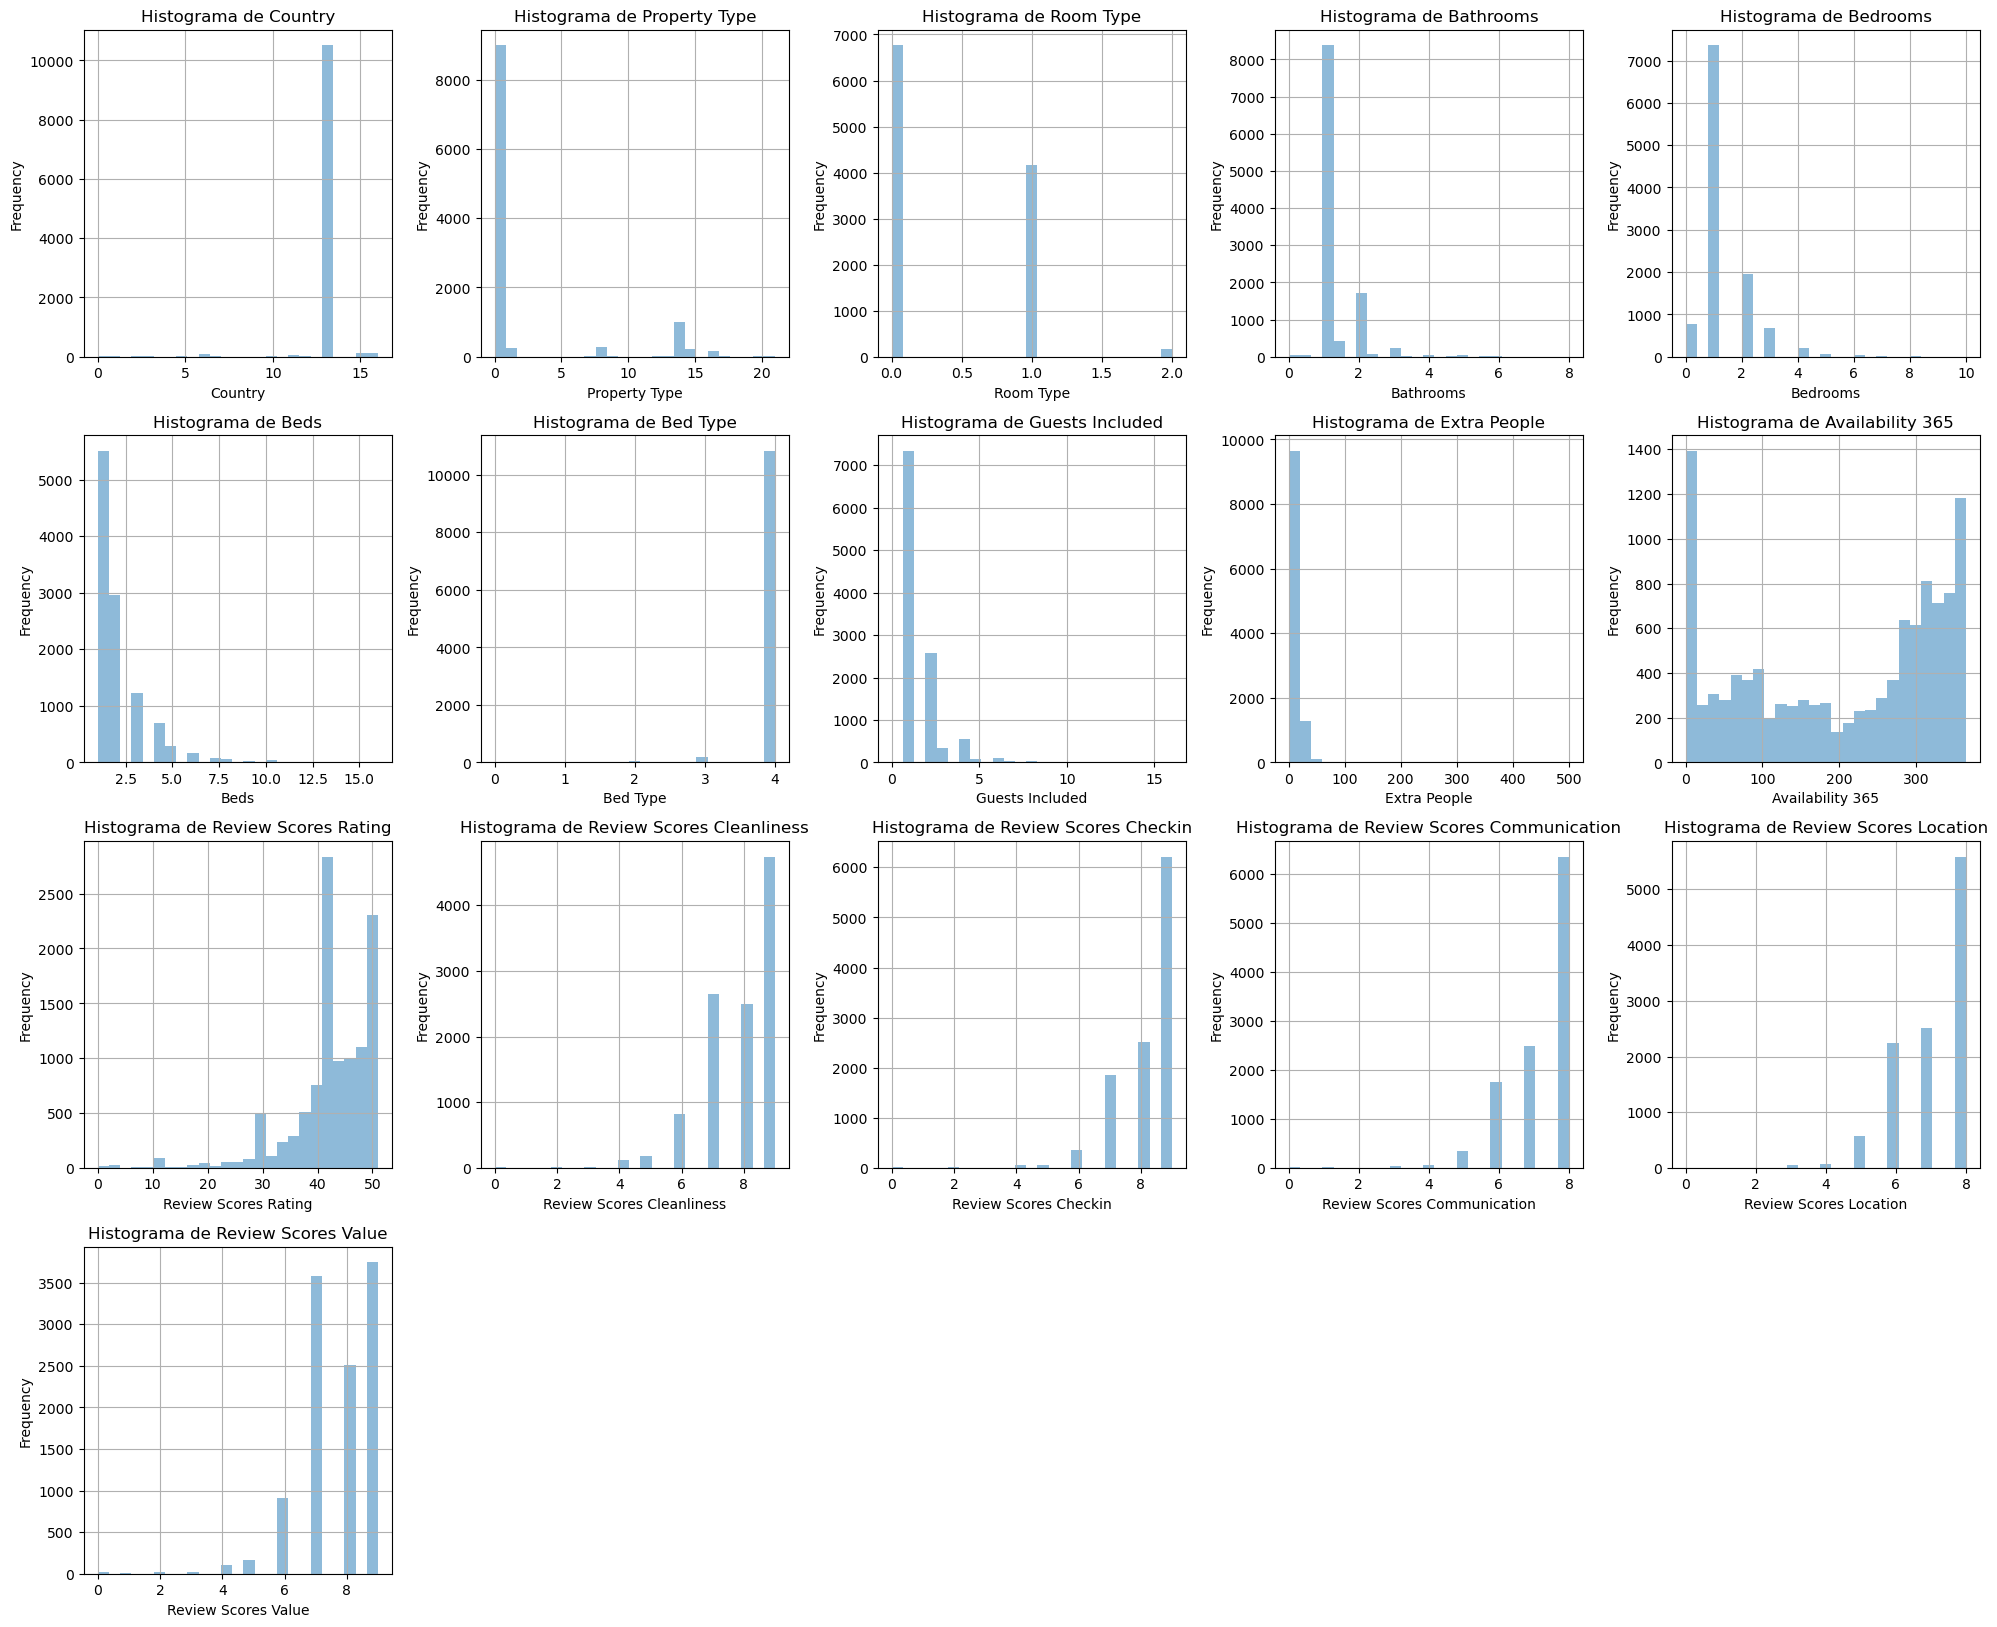

In [207]:
# Definir las columnas a graficar
columnas_a_graficar = [
    "Country", 
    "Property Type", "Room Type", "Bathrooms", 
    "Bedrooms", "Beds", "Bed Type", "Guests Included", 
    "Extra People", "Availability 365", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

# Configurar la figura
plt.figure(figsize=(20, 20))

# Crear un histograma para cada columna
for i, column in enumerate(columnas_a_graficar):
    plt.subplot(5, 5, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    X_train[column].plot.hist(alpha=0.5, bins=25, grid=True)
    plt.xlabel(column)
    plt.title(f'Histograma de {column}')

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()

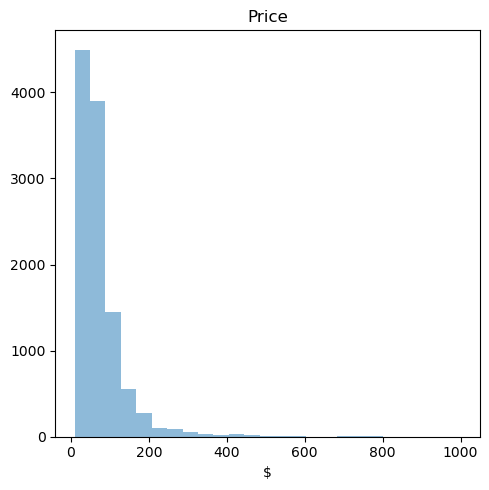

In [208]:
# Configurar la figura
plt.figure(figsize=(5, 5))

# Crear un histograma para cada columna

plt.hist(y_train, alpha=0.5, bins=25)
plt.xlabel("$")
plt.title("Price")

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()

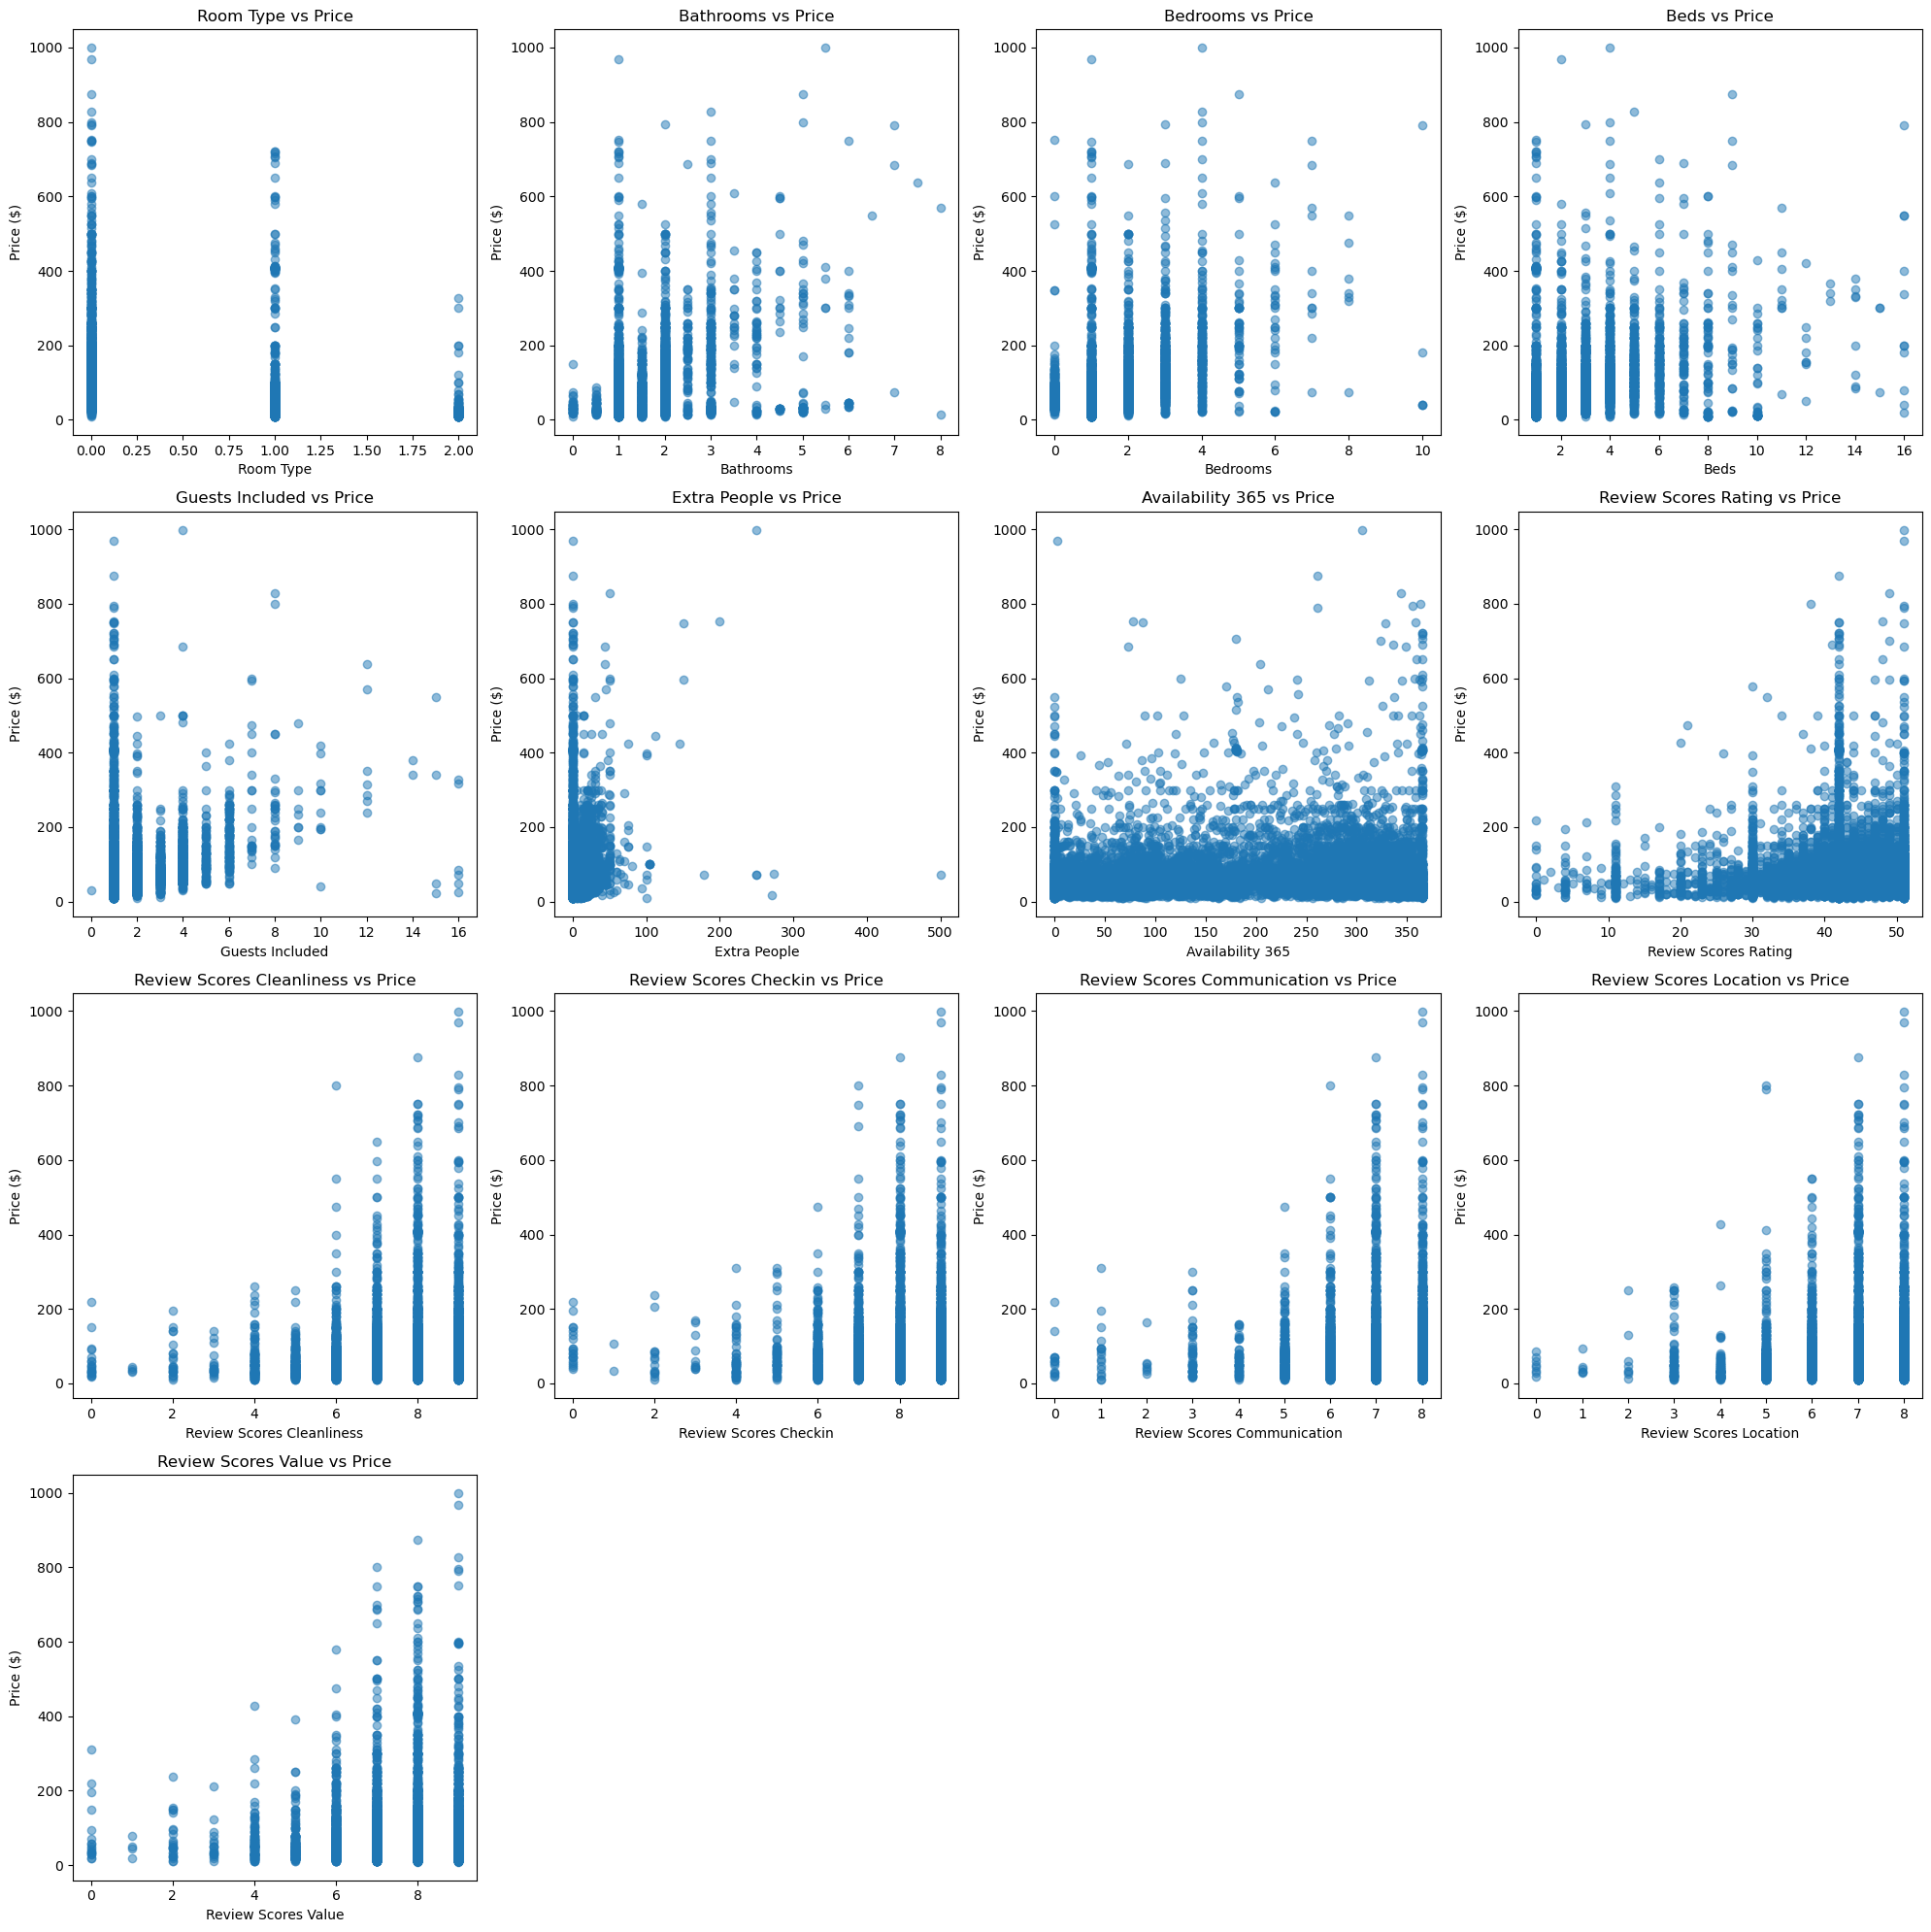

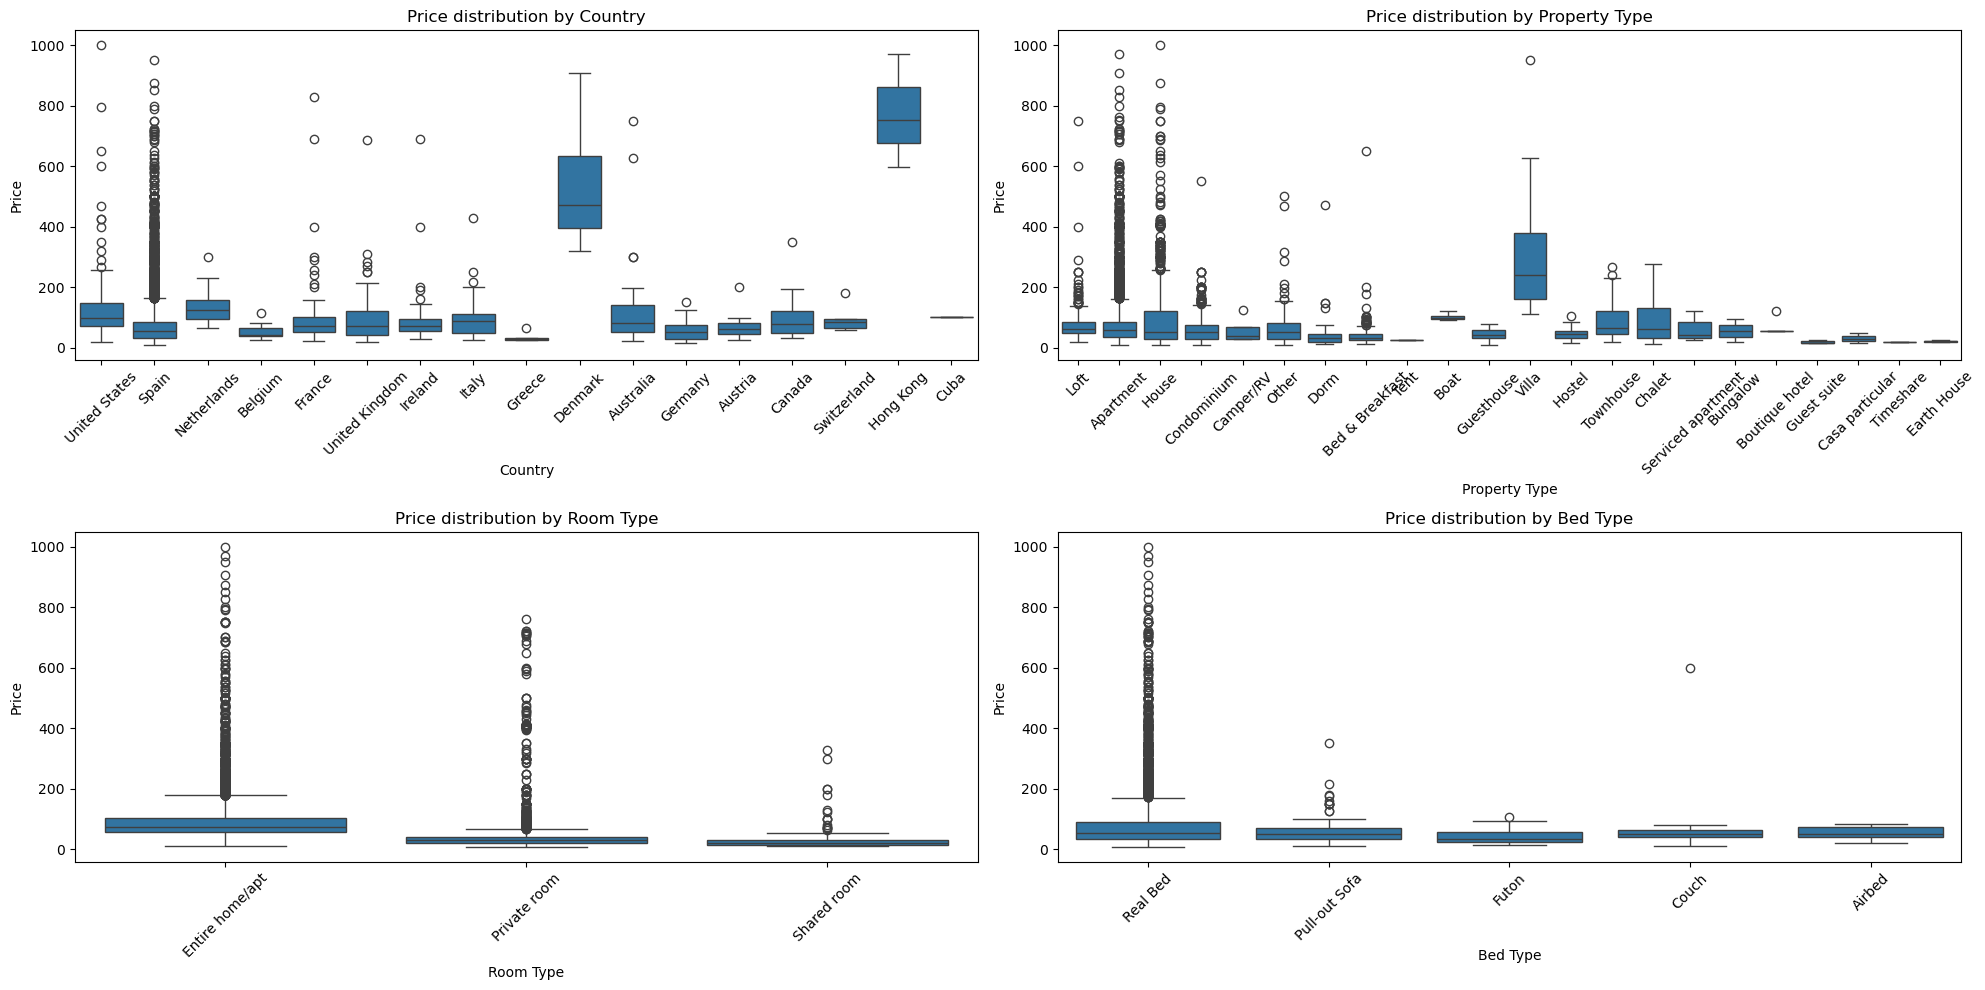

In [209]:
# Mostrar scatter plot de las variables
columnas_a_graficar = [
    "Room Type", "Bathrooms", "Bedrooms", "Beds", "Guests Included", 
    "Extra People", "Availability 365", "Review Scores Rating", 
    "Review Scores Cleanliness", "Review Scores Checkin", 
    "Review Scores Communication", "Review Scores Location", "Review Scores Value"
]

plt.figure(figsize=(20, 20))

# Crear scatter plots
for i, column in enumerate(columnas_a_graficar):
    plt.subplot(4, 4, i + 1)
    plt.scatter(X_train[column], y_train, alpha=0.5)  # Usar plt.scatter directamente
    plt.xlabel(column)
    plt.ylabel('Price ($)')
    plt.title(f'{column} vs Price')

plt.tight_layout()
plt.show()

# Mostrar boxplot de las variables categóricas
columnas_a_graficar_box = [
    "Country", "Property Type", "Room Type", "Bed Type"
]

plt.figure(figsize=(20, 10))

for i, column in enumerate(columnas_a_graficar_box):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=column, y='Price', data=airbnb)  # Usar seaborn para mejores boxplots
    plt.xticks(rotation=45)
    plt.title(f'Price distribution by {column}')

plt.tight_layout()
plt.show()

### Matriz de correlación

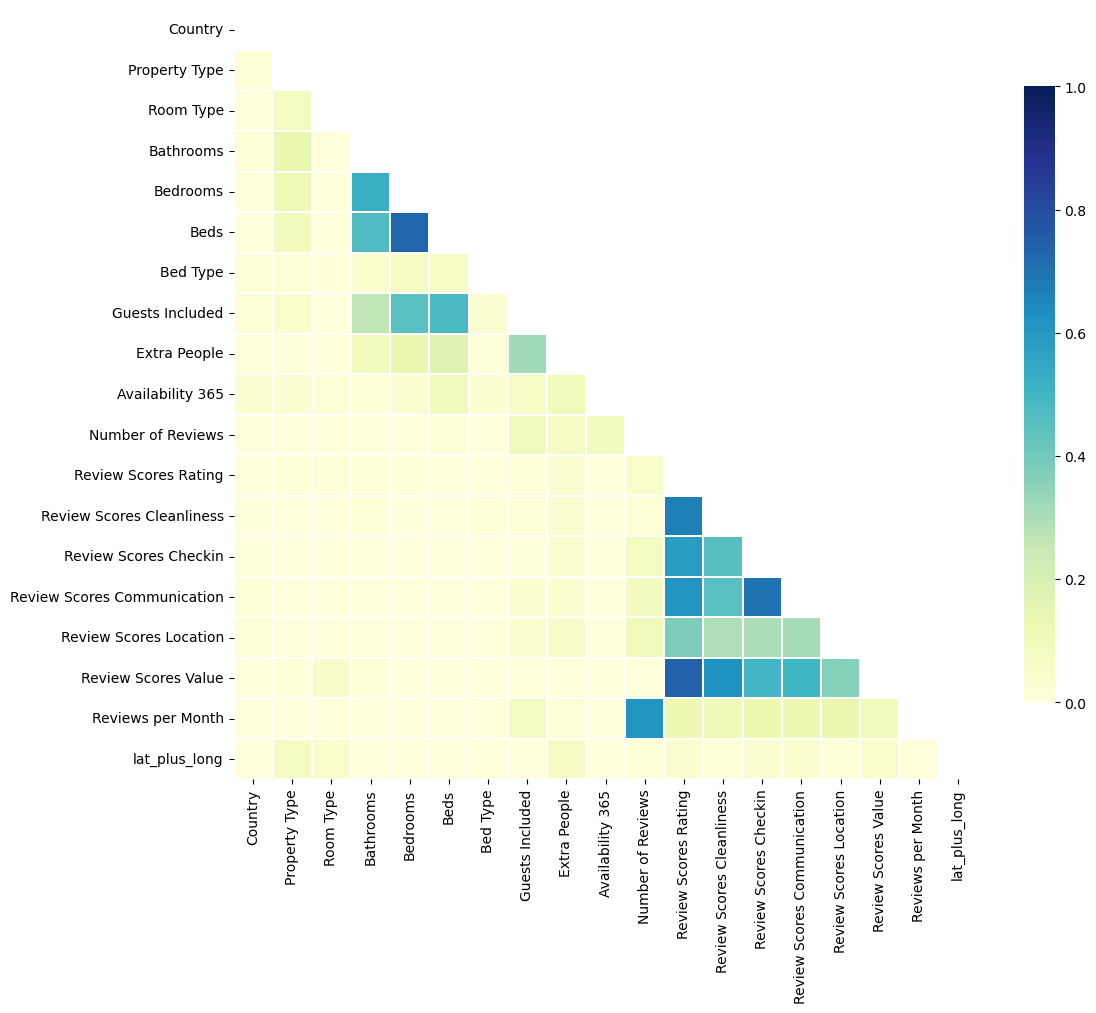

In [210]:
import seaborn as sns

# Generación de la matriz de correlación
corr = np.abs(X_train).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [211]:
X_train.corr()

,Country,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,lat_plus_long
Country,1.000000,0.014694,0.001110,0.014663,-0.005414,0.002723,0.016526,0.015386,-0.021859,0.038701,-0.018351,-0.000668,0.006921,0.004096,0.007841,0.012327,-0.006684,-0.004296,0.059571
Property Type,0.014694,1.000000,0.080172,0.137246,0.116945,0.093337,0.017688,0.041814,0.004410,0.033546,-0.073323,0.009650,-0.002584,-0.005102,-0.010586,-0.043541,0.009571,-0.050508,-0.060103
Room Type,0.001110,0.080172,1.000000,-0.023987,-0.260371,-0.283426,-0.013605,-0.324541,-0.095604,0.016600,-0.122044,0.013207,-0.016793,-0.007126,-0.033780,-0.080317,0.051395,-0.095335,-0.060764
Bathrooms,0.014663,0.137246,-0.023987,1.000000,0.526651,0.470703,0.045294,0.263871,0.098472,0.010349,-0.068334,0.014313,0.015754,-0.030910,-0.031727,0.003027,0.013890,-0.072278,0.044784
Bedrooms,-0.005414,0.116945,-0.260371,0.526651,1.000000,0.730295,0.071881,0.450917,0.137480,0.032674,-0.040274,0.009713,0.005765,-0.026841,-0.006494,-0.030551,-0.014270,-0.059099,0.052454
Beds,0.002723,0.093337,-0.283426,0.470703,0.730295,1.000000,0.060523,0.477953,0.171259,0.088478,0.021754,-0.044891,-0.024928,-0.048945,-0.028829,-0.022798,-0.064903,-0.016834,0.071958
Bed Type,0.016526,0.017688,-0.013605,0.045294,0.071881,0.060523,1.000000,0.032121,0.004908,0.024732,-0.006375,0.003480,0.013515,0.002785,-0.006121,-0.017295,0.003035,-0.001520,0.013237
Guests Included,0.015386,0.041814,-0.324541,0.263871,0.450917,0.477953,0.032121,1.000000,0.317030,0.060412,0.097233,0.015101,0.023340,0.007415,0.024703,0.038917,-0.020307,0.076791,0.023303
Extra People,-0.021859,0.004410,-0.095604,0.098472,0.137480,0.171259,0.004908,0.317030,1.000000,0.097466,0.063283,0.032707,0.027698,0.031663,0.031741,0.048773,0.000303,0.013718,-0.016431
Availability 365,0.038701,0.033546,0.016600,0.010349,0.032674,0.088478,0.024732,0.060412,0.097466,1.000000,0.091886,-0.062098,-0.021994,-0.033094,-0.046319,-0.033411,-0.092344,-0.009803,0.036871


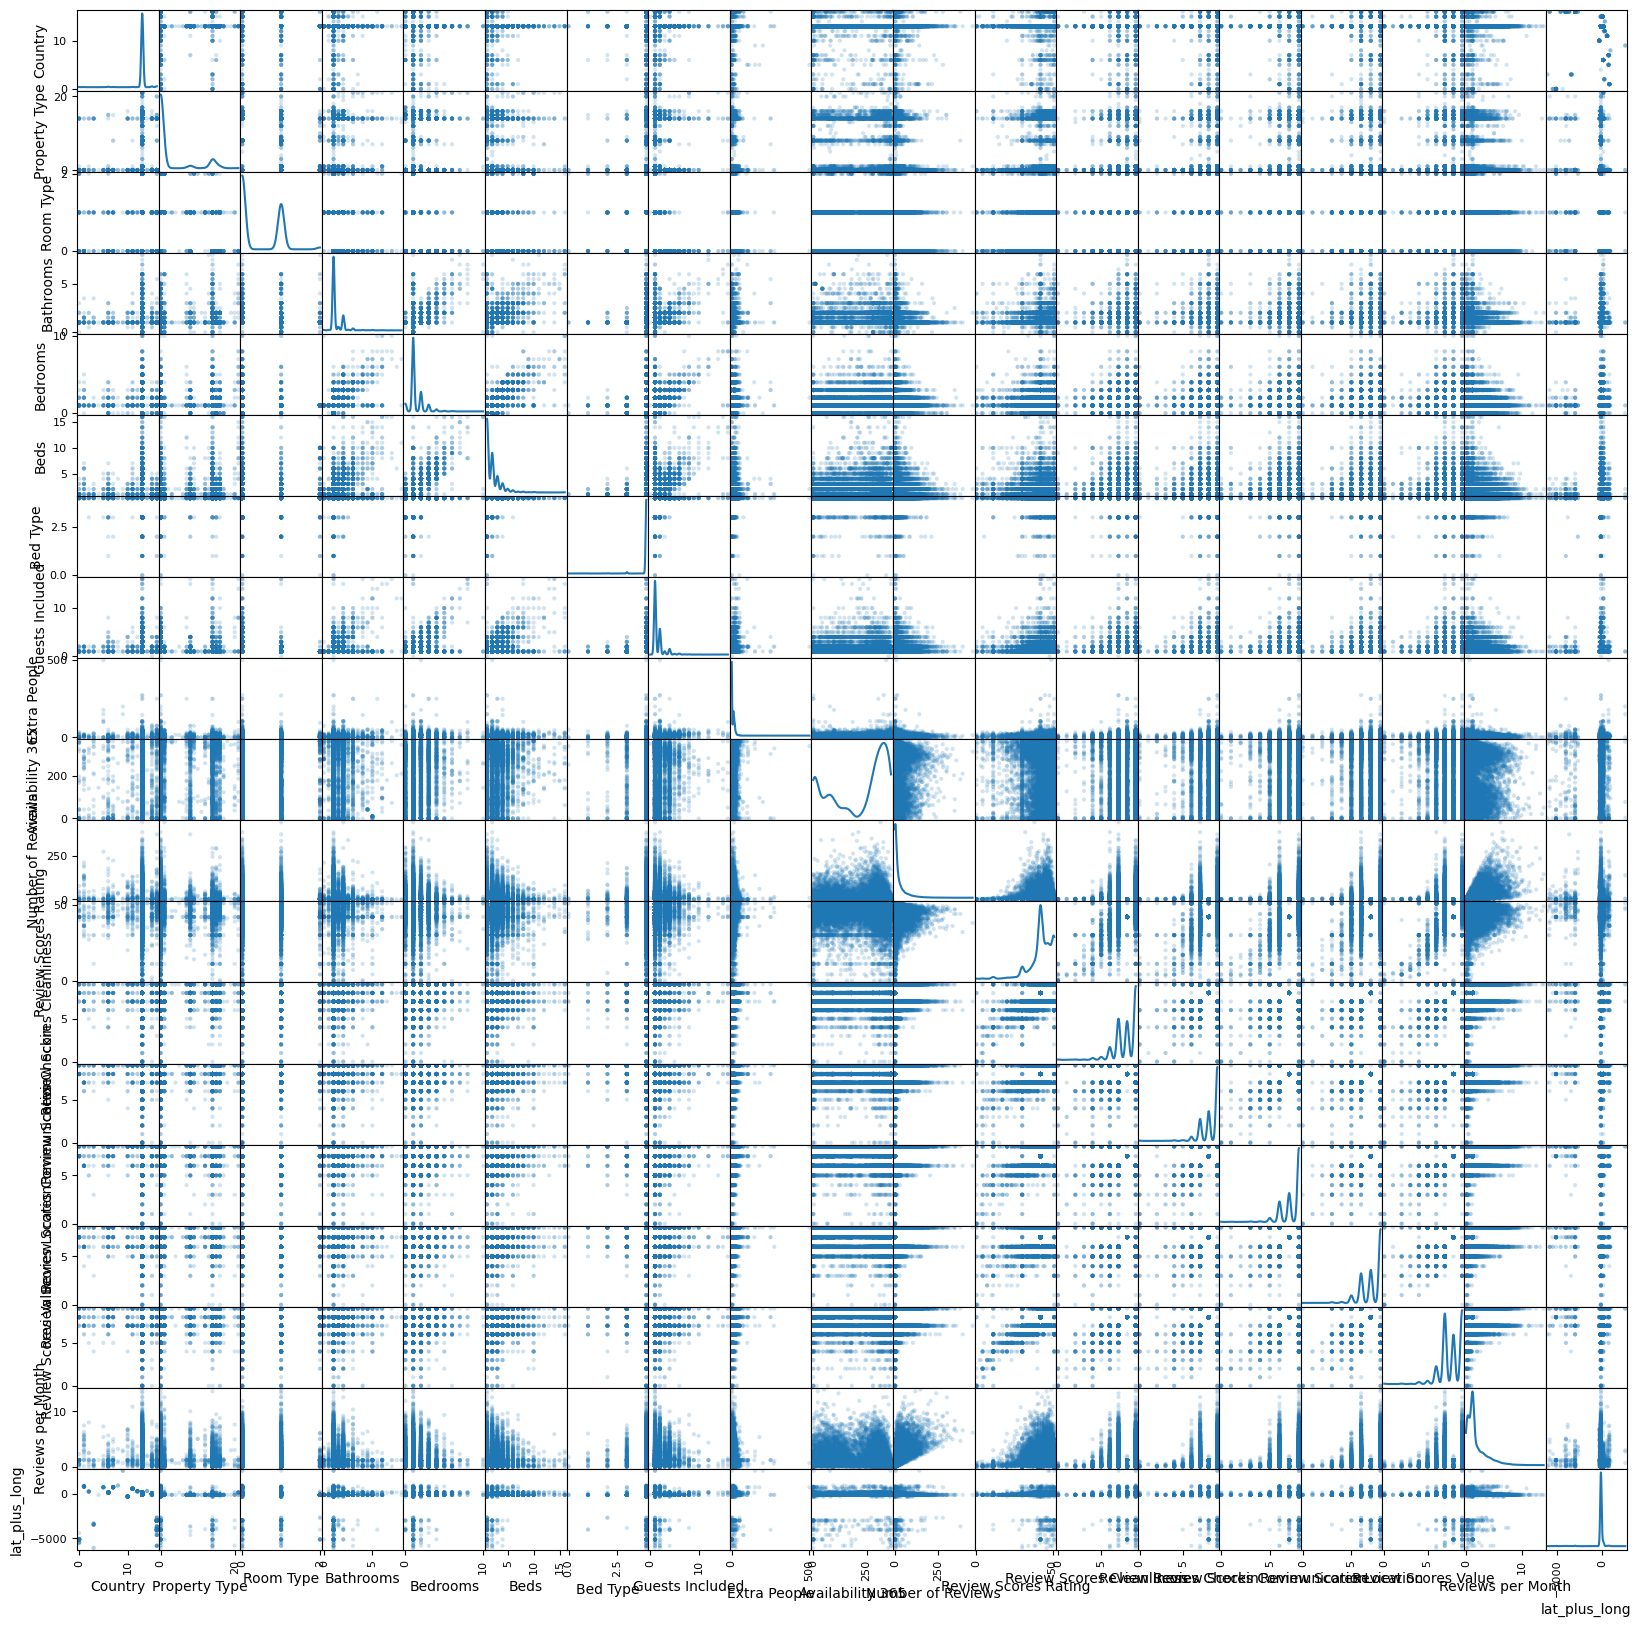

In [212]:
pd.plotting.scatter_matrix(X_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [213]:
# 1. Ver el número total de NaN por columna
print("Número de NaN por columna:")
print(X_train.isna().sum())

# 2. Ver el porcentaje de NaN por columna
print("\nPorcentaje de NaN por columna:")
print((X_train.isna().sum() / len(X_train) * 100).round(2))

# 3. Ver solo las columnas que tienen NaN
print("\nColumnas con NaN:")
nan_cols = X_train.columns[X_train.isna().any()].tolist()
for col in nan_cols:
    n_missing = X_train[col].isna().sum()
    pct_missing = (n_missing / len(X_train) * 100).round(2)
    print(f"{col}: {n_missing} valores faltantes ({pct_missing}%)")

# 4. Ver el número total de NaN en todo el dataset
print(f"\nTotal de NaN en el dataset: {X_train.isna().sum().sum()}")

Número de NaN por columna:
Country                        0
Property Type                  0
Room Type                      0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Guests Included                0
Extra People                   0
Availability 365               0
Number of Reviews              0
Review Scores Rating           0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Scores Location         0
Review Scores Value            0
Reviews per Month              0
lat_plus_long                  0
dtype: int64

Porcentaje de NaN por columna:
Country                        0.0
Property Type                  0.0
Room Type                      0.0
Bathrooms                      0.0
Bedrooms                       0.0
Beds                           0.0
Bed Type                       0.0
Guests Included                0.0
Extra People         

## Modelado

### Modificación de los datos

In [214]:

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)


Datos entrenamiento:  (11085, 19)
Datos test:  (3695, 19)


### LASSO

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor score de validación cruzada: -3224.484
Mejores parámetros: {'alpha': 0.1}
Mejor estimador: Lasso(alpha=0.1, random_state=42)


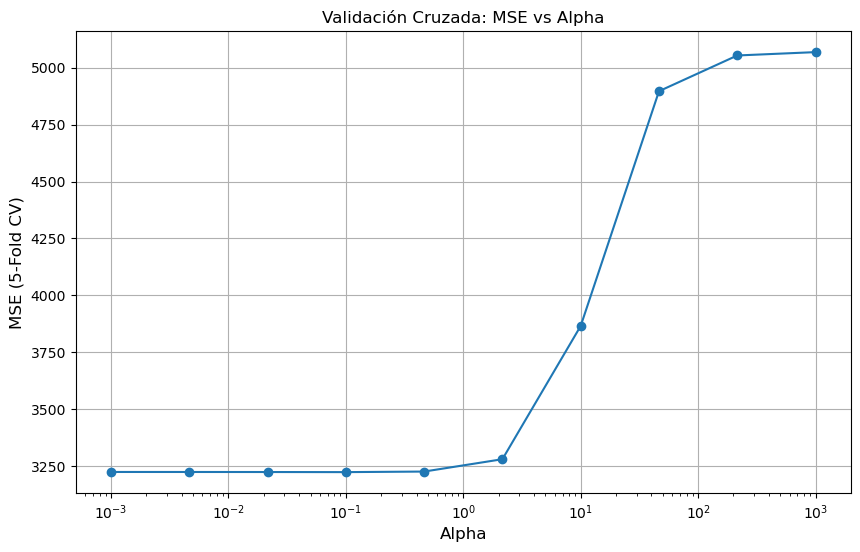

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Definir rango de alphas
alpha_vector = np.logspace(-3, 3, 10)  

# Configurar grid search
param_grid = {'alpha': alpha_vector}
grid = GridSearchCV(
    Lasso(random_state=42),  # Añadir random_state para reproducibilidad
    scoring='neg_mean_squared_error',
    param_grid=param_grid,
    cv=5,  # Aumentar número de folds
    verbose=2,
    n_jobs=-1  # Usar todos los cores disponibles
)

# Ajustar el modelo
grid.fit(X_train, y_train)

# Mostrar resultados
print("Mejor score de validación cruzada: {:.3f}".format(grid.best_score_))
print("Mejores parámetros:", grid.best_params_)
print("Mejor estimador:", grid.best_estimator_)

# Visualizar resultados
plt.figure(figsize=(10, 6))
scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('MSE (5-Fold CV)', fontsize=12)
plt.grid(True)
plt.title('Validación Cruzada: MSE vs Alpha')
plt.show()

In [216]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_drop.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.18e+03
MSE Modelo Lasso (test) : 3.53e+03
RMSE Modelo Lasso (train): 56.4
RMSE Modelo Lasso (test) : 59.4
Property Type -2.6426033084320726
Room Type 0.3711649756795307
Bathrooms -38.8231109062786
Bedrooms 21.56946061741467
Beds 18.097313834649604
Bed Type 4.017771483160151
Price -0.0
Guests Included 0.9575753033819783
Extra People 0.15044277478173484
Availability 365 0.029012191528534202
Number of Reviews -0.07506035729564867
Review Scores Rating 0.44043448565343823
Review Scores Cleanliness 2.590302404661405
Review Scores Checkin -2.2045886820163916
Review Scores Communication -2.6700883016661185
Review Scores Location 4.006970515331255
Review Scores Value 0.1762626290183577
Reviews per Month -2.5516157220115896


In [217]:
from sklearn.metrics import r2_score

# Ajustar el modelo Lasso con el mejor alpha encontrado
lasso = Lasso(alpha=grid.best_params_['alpha']).fit(X_train, y_train)

# Predecir los valores para los conjuntos de entrenamiento y prueba
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calcular el R^2 para ambos conjuntos
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R^2 (train): {r2_train:.3f}')
print(f'R^2 (test): {r2_test:.3f}')

R^2 (train): 0.371
R^2 (test): 0.363


In [218]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  10.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   9.6s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   9.6s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  14.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  14.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  14.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  19.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  19.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  18.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   4.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   4.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   4.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  10.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   9.6s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   9.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  14.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  15.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  14.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  19.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  18.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  18.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


best mean cross-validation score: 0.517
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


### Bagging

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=4; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=4; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=5; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=5; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=6; total time=   0.1s
[CV] END .............................estimator__max_depth=6; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=6; total time=   0.1s
[CV] END .............................estimator__max_depth=6; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=6; total time=   0.1s
[CV] END .............................estimator__max_depth=7; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=7; total time=   0.1s
[CV] END .............................estimator__max_depth=7; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=7; total time=   0.1s
[CV] END .............................estimator__max_depth=7; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


best mean cross-validation score: -2670.336
best parameters: {'estimator__max_depth': 9}


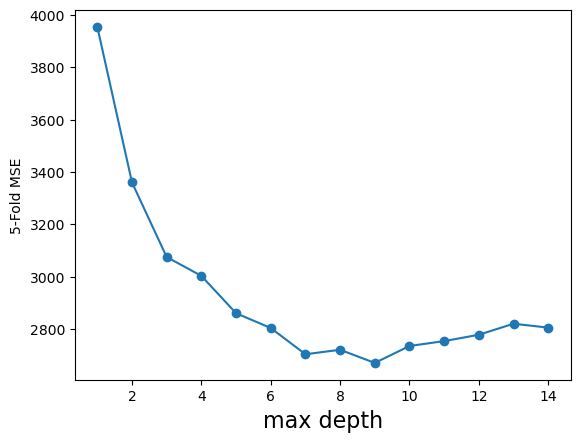

In [219]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor

max_depth_vector = range(1,15)
param_grid = {'estimator__max_depth': max_depth_vector}
grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0)),
    scoring= 'neg_mean_squared_error',
    param_grid=param_grid,
    cv = 5,
    verbose=2
).fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [80]:
maxDepthOptimo = grid.best_params_['estimator__max_depth']
baggingModel = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),
    n_estimators=200
).fit(X_train,y_train)

print("Train: ", baggingModel.score(X_train,y_train))
print("Test: ", baggingModel.score(X_test,y_test))

Train:  0.814077357112468
Test:  0.5625316007386278


### Random Forest

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.4s
[CV] END .......................................

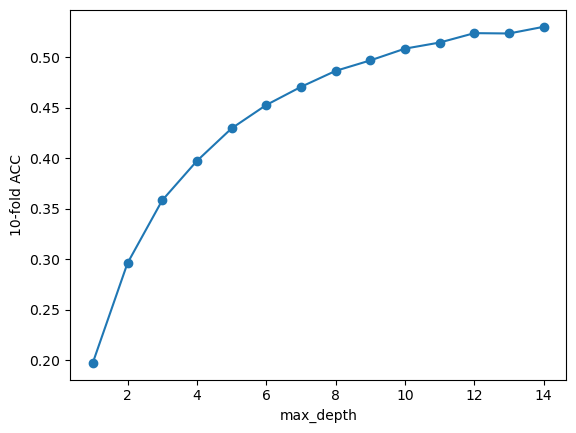

In [84]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [85]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.7902293284362183
Test:  0.5502066889382116


### Otros Boosting

In [220]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0, max_depth=5, learning_rate=0.09, n_estimators=500)
xgb.fit(X_train,y_train)

print("Train: ",xgb.score(X_train,y_train))
print("Test: ",xgb.score(X_test,y_test))

Train:  0.8386653673698772
Test:  0.5118138480683609


In [221]:
from lightgbm import LGBMRegressor

gbm = LGBMRegressor(random_state=0, max_depth=5,learning_rate=0.09, n_estimators=500)
gbm.fit(X_train,y_train)

print("Train: ",gbm.score(X_train,y_train))
print("Test: ",gbm.score(X_test,y_test))

C:\Users\miba_\AppData\Roaming\Python\Python312\site-packages\lightgbm\basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 11085, number of used features: 19
[LightGBM] [Info] Start training from score 73.285263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

### SVR

In [222]:
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................................C=0.01, gamma=1e-05; total time=   5.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [110]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_train,y_train)
print(f'Acc (TEST): {svmModel.score(X_test,y_test):0.2f}')

Acc (TEST): 0.33


## Resumen

### Valores de los modelos

In [111]:
print("Scoring de los modelos usados")
print("-"*40)
print("Lasso")
print(f'R^2 (train): {r2_train:.3f}')
print(f'R^2 (test): {r2_test:.3f}')
print("-"*40)
print("Bagging")
print("Train: ", baggingModel.score(X_train,y_train))
print("Test: ", baggingModel.score(X_test,y_test))
print("-"*40)
print("RandomForest")
print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))
print("-"*40)
print("XGBoost")
print("Train: ",xgb.score(X_train,y_train))
print("Test: ",xgb.score(X_test,y_test))
print("-"*40)
print("LightGBM")
print("Train: ",gbm.score(X_train,y_train))
print("Test: ",gbm.score(X_test,y_test))
print("-"*40)
print("SVR")
print(f'Acc (TEST): {svmModel.score(X_test,y_test):0.2f}')

Scoring de los modelos usados
----------------------------------------
Lasso
R^2 (train): 0.379
R^2 (test): 0.367
----------------------------------------
Bagging
Train:  0.814077357112468
Test:  0.5625316007386278
----------------------------------------
RandomForest
Train:  0.7902293284362183
Test:  0.5502066889382116
----------------------------------------
XGBoost
Train:  0.8058659607377074
Test:  0.5716465320817556
----------------------------------------
LightGBM
Train:  0.7190297358555799
Test:  0.5521254731269116
----------------------------------------
SVR
Acc (TEST): 0.33


Los mejores modelos son Bagging y XGBoost por otro lado SVR y Lasso me dan calificaciones bastante mediocres.